In [60]:
S = 80
X = 80
T = 2
r = 0.04
sigma = 0.5
N = range(20, 400)

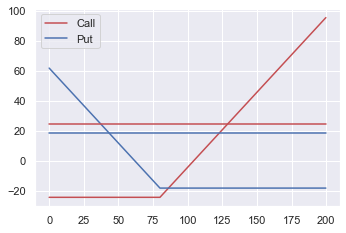

In [67]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

# European options
def callPrice(S, X, r, T, sigma): 
    d1 = (np.log(S/X) + (r + 0.5 * sigma**2)*T)/(sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return (S * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2))

def putPrice(S, X, r, T, sigma):
    d1 = (np.log(S/X) + (r + 0.5 * sigma**2)*T)/(sigma * np.sqrt(T));
    d2 = d1 - sigma * np.sqrt(T);
    return (X * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1))

def callPayoff(S, X, callprice):
    return list(map(lambda s: max(s - X, 0) - callprice, S))

def putPayoff(S, X, putPrice):
    return list(map(lambda s: max(X - s, 0) - putprice, S))

callprice = callPrice(S, X, r, T, sigma)
delS = [t/5 for t in range(0,1000)] 
callpayof = callPayoff(delS, X, callprice)

putprice = putPrice(S, X, r, T, sigma)
putpayof = putPayoff(delS, X, putprice)

sns.set(rc={'figure.figsize':(12,8)})
plt.subplot(221)
plt.legend('callPayoff', 'putPayoff')
plt.plot(delS, callpayof, 'r')
plt.plot(delS, putpayof, 'b')

St = np.arange(0, 80)
vals_call = [callPrice(S, X, r, T, sigma) for x in delS]
vals_put = [putPrice(S, X, r, T, sigma) for x in delS]
plt.plot(delS,vals_call, 'r', label = "Call")
plt.plot(delS, vals_put, 'b', label  = "Put")
plt.legend()
plt.show()

In [16]:
# Binomial model
dt = T / N
u = np.exp(sigma*np.sqrt(dt))
d = np.exp(-sigma*np.sqrt(dt))
p = (np.exp(r*dt) - d) / (u - d)
def Sij(S, u, d, j):
    return S * (u**i) * d(j-i)

# European 
def callBinomial(n, p, S, u, d, X):
    i = range(n) 
    return np.exp(-r*T) * (n / (i*(n-i)))*(p**i)*((1-p)**(n-i))*max(Sij(S, u, d, n) - X, 0)
def putBinomial(n, p, S, u, d, X):
    i = range(n) # ???
    return np.exp(-r*T) * (n / (i*(n-i)))*(p**i)*((1-p)**(n-i))*max(-Sij(S, u, d, n) + X, 0)

# American put option
def AmericanPut(X, i, j, p):
    return max(X - Sij(S, u, d, j), np.exp(-r*T)*(p*AmericanPut(X, i+1, j+1, p) + (1-p)*AmericanPut(X, i, j+1, p)))